# Concurrency using Asyncio in Python

### Concurrency
In computer science, concurrency is the ability of different parts or units of a program to be executed out-of-order or in partial order, without affecting the final outcome.

concurrency is a property of system which enables overlapping of process lifetimes

### Asynchronous Python 
A style of concurrent programming in which the tasks release the CPU during waiting periods, so that other tasks can use it.



### Suspend and Resume
- Async functions need the ability to suspend and resume
- A function that enters a waiting period is suspended, and only resumed when the wait is over
- Four ways to implement suspend/resume in python without OS help:
    - Callback functions
    - Generator functions
    - Async/await
    - Greenlets (requires greenlet packages)

### Scheduling Asynchronous Tasks
- Async frameworks need a scheduler, usually called "event loop"
- The loop keeps track of all the runing tasks
- When a function is suspended, return controls to the loop, which then finds another function to start or resume
- This is called "cooperative multi-tasking"

#### Example: Synchronous Python
print hello "wait" for 3 sec, then print "words"


In [8]:
import time

def hello():
    print('Hello')
    time.sleep(3)
    print('World!')

if __name__ == '__main__':
    hello()

Hello
World!


#### Example: Asyncio
print hello "wait" for 3 sec, then print "words"

In [1]:
import asyncio
loop = asyncio.get_event_loop()

async def hello():
    print('Hello')
    await asyncio.sleep(3)
    print('World!')

if __name__ == '__main__' :
    await hello()
#     loop.run_until_complete(hello())


Hello
World!


### When not to use Async

### CPU Heavy Tasks
- Long CPU-intensive tasks must routinely release the CPU to avoid starving other tasks
- This can be done by "sleeping" periodically, such as once per loop iteration
- To tell the loop to return control back as possible, sleep for 0 seconds
    Example: await asyncio.sleep(0)

### Async and the Python Standard Library
- Blocking library functions are incompatible with async frameworks
    - reading/writing from network socket ,anything related with processes, threading, waiting on i/p and o/p on sockets, sleep functions can not be used
- All sync frameworks provide non-blocking replacements for these
- Eventlet and Gevent can "monkey-patch" the std library to make it async compatible


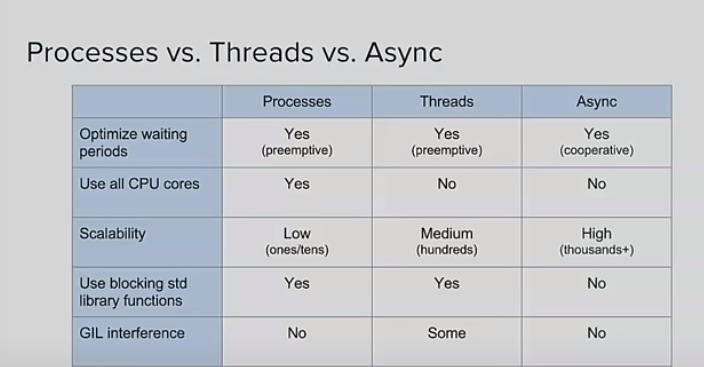


miguel - https://www.youtube.com/watch?v=iG6fr81xHKA
pip install -U aiohttp

https://gist.github.com/miguelgrinberg/f15bc03471f610cfebeba62438435508
    

In [7]:
def countdown(n):
    while n > 0:
        yield n
        n-=1
# <generator object countdown at 0x00000170E871EBC8>
x = countdown(5)
# next(x)

5

In [21]:
def greet(name):
    return 'Hello ' + name

print(greet)
greet('Python')

<function greet at 0x00000170E7BCA0D8>


'Hello Python'

In [23]:
async def _greet(name):
    return 'Hello ' + name

print(greet)
_greet('Python')

<function greet at 0x00000170E7BCA0D8>


<coroutine object _greet at 0x00000170E7BC52C8>

In [24]:
g = _greet('some text here')

In [25]:
g

<coroutine object _greet at 0x00000170E7BC5548>

In [26]:
g.send(None)

StopIteration: Hello some text here

In [29]:
def run(coroutine):
    try:
        coroutine.send(None)
    except StopIteration as e:
        return e.value

In [30]:
run(_greet('Python'))

'Hello Python'

In [31]:
run(_greet('Abhishek'))

'Hello Abhishek'

In [32]:
run(_greet('India'))

'Hello India'

In [33]:
g = _greet('Bengaluru')

In [34]:
g

<coroutine object _greet at 0x00000170E7BC5948>

In [35]:
run(g)

'Hello Bengaluru'

In [36]:
# one async func can call other async function using await
async def main():
    print(await _greet('India'))

In [37]:
run(main())

Hello India


In [47]:
import time
def count():
    time.sleep(1)
    print('1')
    time.sleep(1)
    print('2')
    time.sleep(1)
    print('3')

def main():
    count()
    count()
    count()

if __name__ == '__main__':
    t1 = time.perf_counter()
    main()
    t2 = time.perf_counter()
    print(t2-t1)

1
2
3
1
2
3
1
2
3
9.07624950000013


In [46]:
import asyncio

async def count():
    await asyncio.sleep(1)
    print('1')
    await asyncio.sleep(1)
    print('2')
    await asyncio.sleep(1)
    print('3')

async def main():
    await asyncio.gather(count(),count(),count())

if __name__ == '__main__':
    t1 = time.perf_counter()
    await main()
    t2 = time.perf_counter()
    print(t2-t1)
#     asyncio.run(main())

1
1
1
2
2
2
3
3
3
3.0108222000001206


async
this took 3 sec to run , the first ciunt cycle started and as soon as it hits await sleep(1). Python was free to do other works for insta starting 2nd subsrquently 3rd coutn cycle . thjis si why we have all the one 2 and 3
programming concurrently can be a very valuable tool.
multiprocesin has OS role of multi tasking work.
thgreads OS is still doin al lof multitasking work.
GIL prevents multicore concurrency.
in async no OS intervention, there is 1 procesw there is 1 thread , so- task can release CPU during waiting periodso that other taskas can use  it.




Asynchronous framework need a scheduler , usually called an event loop. this jkeeps track of all the running task, and wen func is suspended , it return control to the event loop, whhc then will find other func to start/ resume. This is called as  cooperative multi tasking.
Asicio provides a framework and anyshronous fraework  that send it to on this event loop and it effiect ly handles i/o events. an applicationa interacts with event loop explicitly. It registers code ito be run and let the scheulder make the necessary calls into applicaiton ocoide whe the resource is available.

the mechanism ofrom yielding control back to the event loop depends on coroutine.
coroutine are language construct design for concurent operation. it compose executin using await keyword with another coroutine. while it pause, the coroutine state is maintained allowing it to resume where it left off.one corouttine can start another and wait for result. this makes it easier to decompose taska into reusuable parts.


In [51]:
loop = asyncio.get_event_loop()
async def outer():
    print('in outer')
    print('waiting gfor result1')
    result1 = await phase1()
    print('waitin for phase2')
    result2 = await phase2(result1)
    return result1, result2

async def phase1():
    print('n phase1')
    return 'phase1 result'

async def phase2(arg):
    print('in phase2')
    return f'result2 derived from {arg}'

await outer()

in outer
waiting gfor result1
n phase1
waitin for phase2
in phase2


('phase1 result', 'result2 derived from phase1 result')

coroutine are the foundation for async program in python . foundamental building block of asyncio framework.
What is coroutine

Coroutines are computer program components that generalize subroutines for non-preemptive mulitasking, by allowing execution to be suspended and resumed. It is a function which can pause and resume its execution

A variant of func that enables concurrency via cooperative multitasking

what is func
a seq of instruction that takes input and returns o/p

def square(x):
    return x*x
def main():
    x= square(4)
    print(x)

from dis import dis
dis(square)

multiple task 
-
-
-
-



#### Synchronous - Sequential way

Task-1
Task-2
Task-3
.
.


concurrency is a property of system which enables overlapping of process lifetimes

concurrency - tasks start, run and complete in overlapping time periods - ASYNCIO

parallelism
task run simultaneously - THREADS/PROCESSES + MULTICORE

coroutine
u have just put async keyword

In [ ]:
1. con